### 2.   Load Dataset

**[2.0]** Launch the magic commands for auto-relaoding external modules

In [16]:
# Launch the magic commands for auto-relaoding external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**[2.1]** Import the torch and torchvision packages

**[2.2]** Create a variable called `download` containing the value `True`

**[2.3]** Define a transformation pipeline that will convert the images into tensors and normalise them

In [5]:
# Import the torch and torchvision packages
import torch
import torchvision

# Create a variable called download containing the value True
download = True

# Define a transformation pipeline that will convert the images into tensors and normalise them
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

**[2.4]** Instantiate a torchvision.datasets.MNIST() for the training set, downlows it into `/data/raw/` folder and perform the transformation defined earlier. Save the results in a variable called `train_data`

In [6]:
# Instantiate a torchvision.datasets.MNIST() for the training set, downlows it into /data/raw/ folder and perform the transformation defined earlier. Save the results in a variable called train_data
train_data = torchvision.datasets.MNIST('../data/raw/', train=True, download=download, transform=transform)

**[2.5]** Instantiate a torchvision.datasets.MNIST() for the testing set, downlows it into `/data/raw/` folder and perform the transformation defined earlier. Save the results in a variable called `test_data`

In [7]:
# Instantiate a torchvision.datasets.MNIST() for the testing set, downlows it into /data/raw/ folder and perform the transformation defined earlier. Save the results in a variable called test_data
test_data = torchvision.datasets.MNIST('../data/raw/', train=False, download=download, transform=transform)

### 3. Prepare Data

**[3.1]** Create 2 variables called `batch_size_train` and `batch_size_test` that will respectively take the values 64 and 10

**[3.2]** Import DataLoader from torch.utils.data

**[3.3]** Instantiate a `torch.utils.data.DataLoader()` on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called `train_loader`

**[3.4]** Instantiate a `torch.utils.data.DataLoader()` on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called `test_loader`

In [10]:
# Create 2 variables called batch_size_train and batch_size_test that will respectively take the values 64 and 10
batch_size_train = 64
batch_size_test = 10

# Import DataLoader from torch.utils.data
from torch.utils.data import DataLoader

# Instantiate a torch.utils.data.DataLoader() on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called train_loader
train_loader = DataLoader(train_data, batch_size=batch_size_train, shuffle=True)

# Instantiate a torch.utils.data.DataLoader() on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called test_loader
test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

**[3.5]** Create a generator on the test data loader and extract the first observation

**[3.6]** Print the dimensions of the first image

In [12]:
# Create a generator on the test data loader and extract the first observation
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Print the dimensions of the first image
example_data.shape

torch.Size([10, 1, 28, 28])

**[3.7]** Import matplotlib.pyplot as plt

**[3.8]** Print the first image with its corresponding target

Text(0.5, 1.0, 'Ground Truth: 7')

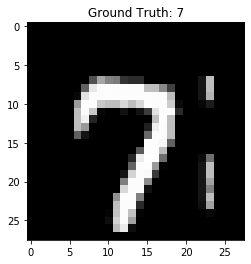

In [13]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Print the first image with its corresponding target
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[0]))

### 4. Define Architecture

**[4.1]** Create a class called `PytorchCNN` that inherits from `nn.Module` with:
- attributes:
    - `conv1`: fully-connected layer with 128 filters of size 3
    - `conv2`: fully-connected layer with 64 filters of size 3
    - `fc1`: fully-connected layer with 128 neurons
    - `fc2`: fully-connected layer with 10 neurons
    - `softmax`: Softmax activation function
- methods:
    - `forward()` with `inputs` as input parameter and will sequentially add the 2 convolution layers with relu and max pool of size 2 followed the 2 full-connected layers respectively with relu and softmax

**[4.2]** Import torch.nn as n, torch.nn.functional as F and torch.optim as optim

**[4.3]** Instantiate a PytorchCNN and save it into a variable called `model` 

**[4.4]** Import the `get_device` function from src.models.pytorch 

**[4.5]** Get the device available and set to the model to use it

In [19]:
# Import torch.nn as n, torch.nn.functional as F and torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import PytorchCNN() and instantiate a PytorchCNN and save it into a variable called model
from src.models.pytorch import PytorchCNN
model = PytorchCNN()

# Import the get_device function from src.models.pytorch
from src.models.pytorch import get_device

# Get the device available and set to the model to use it
device = get_device()
model.to(device)

PytorchCNN(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

### 5. Train the model

**[5.1]** Import train_classification and test_classification from src.models.pytorch

**[5.2]** Instantiate a `nn.CrossEntropyLoss()` and save it into a variable called `criterion`

**[5.3]** Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [21]:
# Import train_classification and test_classification from src.models.pytorch
from src.models.pytorch import train_classification, test_classification

# Instantiate a nn.CrossEntropyLoss() and save it into a variable called criterion
criterion = nn.CrossEntropyLoss()

# Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate 
# and save it into a variable called optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

**[5.4]** Create 2 variables called `N_EPOCHS` and `BATCH_SIZE` that will respectively take the values 50 and 32

**[5.5]** Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [ ]:
# Variables N_EPOCHS and BATCH_SIZE that will respectively take the values 50 and 32:
N_EPOCHS = 5
BATCH_SIZE = 32

# Create a for loop that will iterate through the specified number of epochs and will train the model 
# with the training set and assess the performance on the validation set and print their scores
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_data, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(test_data, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.1f}%')

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0
	(train)	|	Loss: 0.0490	|	Acc: 89.4%
	(valid)	|	Loss: 0.0465	|	Acc: 97.4%
Epoch: 1
	(train)	|	Loss: 0.0465	|	Acc: 97.4%
	(valid)	|	Loss: 0.0464	|	Acc: 97.7%
Epoch: 2
	(train)	|	Loss: 0.0463	|	Acc: 97.8%
	(valid)	|	Loss: 0.0468	|	Acc: 96.5%


**[5.6]** Save the model into the `models` folder

In [ ]:
# Save the model into the models folder
torch.save(model, "../models/pytorch_mnist_cnn.pt")

### 6.   Push changes

**[6.8]** Then go to Github and merge the branch after reviewing the code and fixing any conflict

In [ ]:
"""
# Add you changes to git staging area
git add .

# Create the snapshot of your repository and add a description
git commit -m "pytorch cnn mnist"

# Push your snapshot to Github
git push https://<insert_pat>@github.com/CazMayhem/adv_dsi_lab_6.git

# Check out to the master branch
git checkout master

# Pull the latest updates
git pull https://<insert_pat>@github.com/CazMayhem/adv_dsi_lab_5.git

# Check out to the pytorch_mnist branch
git checkout pytorch_mnist

# erge the master branch and push your changes
git merge master
git push https://<insert_pat>@github.com/CazMayhem/adv_dsi_lab_6.git

# Now go to Github and merge the branch after reviewing the code and fixing any conflict

"""

**[6.9]** Stop the Docker container

In [ ]:
# Stop the Docker container
docker stop adv_dsi_lab_6